<a href="https://colab.research.google.com/github/rollways/JDHW/blob/main/EDA18to21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/T大使/sales_data.csv')
data

,sales_no,categorydescription,categorydescription1,stock_id,stock_description,sales_qty,sale_date,unit_price,member_code,name,member_start_date,first_trans_date
0,PS5339001945,系統用,前臺收款,ZFE02,工本費,1.0,2018-11-01,350.0,9.100000e+12,中區,2000-12-15,2012-07-19
1,PS5352014501,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.0,2018-11-01,282.0,9.100002e+12,中區,2016-04-28,2016-04-25
2,PS5352014501,臉部主課程,不分版,HA89A01,肌因彈潤課程單堂,1.0,2018-11-01,1017.0,9.100002e+12,中區,2016-04-28,2016-04-25
3,PS5352014501,產品正貨,其他,Y129,魔可舒-如意,1.0,2018-11-01,2212.0,9.100002e+12,中區,2016-04-28,2016-04-25
4,PS5352014501,產品正貨,精油,JYA7G1,茶樹精油15ml,1.0,2018-11-01,1106.0,9.100002e+12,中區,2016-04-28,2016-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...
2182489,PS5219003003,產品正貨,保健品,RAD2G2,紫錐花護體飲 10ml*10支,1.0,2021-06-30,500.0,9.100003e+12,竹區,2020-06-15,2020-06-15
2182490,PS5219003003,產品正貨,保健品,RAACG1,健麗齊BC-HA複合益生菌3g*60包,1.0,2021-06-30,1050.0,9.100003e+12,竹區,2020-06-15,2020-06-15
2182491,PS5219003003,產品正貨,髮品,JAJ1G1,阿甘絲柔洗髮精800ml,1.0,2021-06-30,640.0,9.100003e+12,竹區,2020-06-15,2020-06-15
2182492,PS5219003003,產品正貨,精油,JZB4G1,呼暢護隨精油30ml,1.0,2021-06-30,1140.0,9.100003e+12,竹區,2020-06-15,2020-06-15


In [4]:
data.rename(columns={'sales_no':'InvoiceNo'},inplace=True)
data.rename(columns={'stock_id':'StockCode'},inplace=True)
data.rename(columns={'stock_description':'Description'},inplace=True)
data.rename(columns={'sales_qty':'Quantity'},inplace=True)
data.rename(columns={'sale_date':'InvoiceDate'},inplace=True)
data.rename(columns={'unit_price':'UnitPrice'},inplace=True)
data.rename(columns={'member_code':'CustomerID'},inplace=True)
data.rename(columns={'name':'Country'},inplace=True)
data.rename(columns={'member_code':'CustomerID'},inplace=True)
data.rename(columns={'member_start_date':'member_start_date'},inplace=True)
data.rename(columns={'first_trans_date':'first_trans_date'},inplace=True)
data.head()

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5339001945,系統用,前臺收款,ZFE02,工本費,1.0,2018-11-01,350.0,9.100000e+12,中區,2000-12-15,2012-07-19
1,PS5352014501,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.0,2018-11-01,282.0,9.100002e+12,中區,2016-04-28,2016-04-25
2,PS5352014501,臉部主課程,不分版,HA89A01,肌因彈潤課程單堂,1.0,2018-11-01,1017.0,9.100002e+12,中區,2016-04-28,2016-04-25
3,PS5352014501,產品正貨,其他,Y129,魔可舒-如意,1.0,2018-11-01,2212.0,9.100002e+12,中區,2016-04-28,2016-04-25
4,PS5352014501,產品正貨,精油,JYA7G1,茶樹精油15ml,1.0,2018-11-01,1106.0,9.100002e+12,中區,2016-04-28,2016-04-25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182494 entries, 0 to 2182493
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   InvoiceNo             object 
 1   categorydescription   object 
 2   categorydescription1  object 
 3   StockCode             object 
 4   Description           object 
 5   Quantity              float64
 6   InvoiceDate           object 
 7   UnitPrice             float64
 8   CustomerID            float64
 9   Country               object 
 10  member_start_date     object 
 11  first_trans_date      object 
dtypes: float64(3), object(9)
memory usage: 199.8+ MB


In [6]:
data.shape

(2182494, 12)

In [7]:
pd.set_option('display.float_format',lambda x:'%.2f'% x)

In [8]:
data.isna().any()

InvoiceNo               False
categorydescription     False
categorydescription1    False
StockCode               False
Description             False
Quantity                False
InvoiceDate             False
UnitPrice               False
CustomerID               True
Country                 False
member_start_date        True
first_trans_date         True
dtype: bool

In [9]:
data.drop(data[data['CustomerID'].isnull()].index,inplace=True)
data.shape

(2181376, 12)

In [10]:
data['Revenue'] = data['UnitPrice']
data.head()

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5339001945,系統用,前臺收款,ZFE02,工本費,1.00,2018-11-01,350.00,9100000071084.00,中區,2000-12-15,2012-07-19,350.00
1,PS5352014501,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002151296.00,中區,2016-04-28,2016-04-25,282.00
2,PS5352014501,臉部主課程,不分版,HA89A01,肌因彈潤課程單堂,1.00,2018-11-01,1017.00,9100002151296.00,中區,2016-04-28,2016-04-25,1017.00
3,PS5352014501,產品正貨,其他,Y129,魔可舒-如意,1.00,2018-11-01,2212.00,9100002151296.00,中區,2016-04-28,2016-04-25,2212.00
4,PS5352014501,產品正貨,精油,JYA7G1,茶樹精油15ml,1.00,2018-11-01,1106.00,9100002151296.00,中區,2016-04-28,2016-04-25,1106.00


In [11]:
data.Revenue.describe()

count   2181376.00
mean       2226.53
std        3232.71
min      -55800.00
25%         528.00
50%        1148.00
75%        2588.00
max      360000.00
Name: Revenue, dtype: float64

In [12]:
sales_data1 = data.copy()

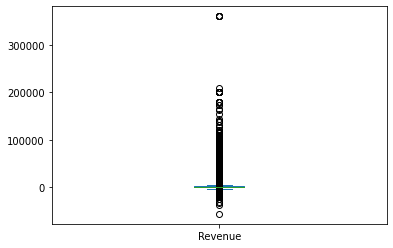

In [13]:
sales_data1['Revenue'].plot.box()

In [14]:
#def寫python的函式
def Outlier_treatment(datacolumn): #傳入datacolumn這個變數
  Q1,Q3 =np.percentile(datacolumn,[25,75]) #算出Q1=25 Q3=75 這個是固定的
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  high_range = Q3 + (1.5*IQR)
  return lower_range,high_range

In [15]:
#抓出異常值
lowerbound,highbound = Outlier_treatment(sales_data1['Revenue'])

sales_data1[(sales_data1['Revenue']< lowerbound) | (sales_data1['Revenue']>highbound)]

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
95,PS5142019714,身體主課程,不分版,HB91A01,(進階)全身深層舒壓SPA單堂,12.00,2018-11-01,18300.00,9100000307244.00,台北B區,2004-03-30,2013-02-19,18300.00
102,PS5552015577,身體副課程,不分版,HB94A01,好手氣舒筋SPA課程單堂,6.00,2018-11-01,6900.00,9100000188133.00,高屏全區,2004-05-29,2012-10-02,6900.00
203,PS5143018561,身體副課程,不分版,HE58A01,溫熱刮痧課程單堂,40.00,2018-11-01,8000.00,9100001037362.00,台北B區,2005-02-02,2012-12-11,8000.00
207,PS5142019701,系統用,券類,ZCP03,產品券(無實體券),1.00,2018-11-01,7000.00,9100002224723.00,台北B區,2016-10-06,2016-10-06,7000.00
208,PS5142019701,系統用,券類,ZCP03,產品券(無實體券),1.00,2018-11-01,7000.00,9100002224723.00,台北B區,2016-10-06,2016-10-06,7000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182270,PS9210002860,醫美療程,不分版,ED01A001,極限音波拉提100條(單堂會員),3.00,2021-06-30,23696.00,9100002174875.00,佐登微爾,2016-05-26,2016-05-26,23696.00
2182335,PS521A001423,臉部主課程,不分版,HA87A01,雪肌淨透SPA課程單堂,8.00,2021-06-30,7200.00,9100003056002.00,台北B區,2020-12-30,2020-12-30,7200.00
2182347,PS9210002861,醫美療程,不分版,ED01A001,極限音波拉提100條(單堂會員),3.00,2021-06-30,23696.00,9100001025666.00,佐登微爾,2003-03-01,2013-07-05,23696.00
2182439,PS9210002863,醫美療程,不分版,EB03A001,晶透亮白超皮秒透亮美肌全臉S1+S2+S3(單堂會員),1.00,2021-06-30,7999.00,9100001025758.00,佐登微爾,2003-01-09,2018-01-14,7999.00


In [16]:
sales_data1.drop(sales_data1[(sales_data1['Revenue']< lowerbound) | (sales_data1['Revenue']> highbound)].index,inplace=True) #去除異常值

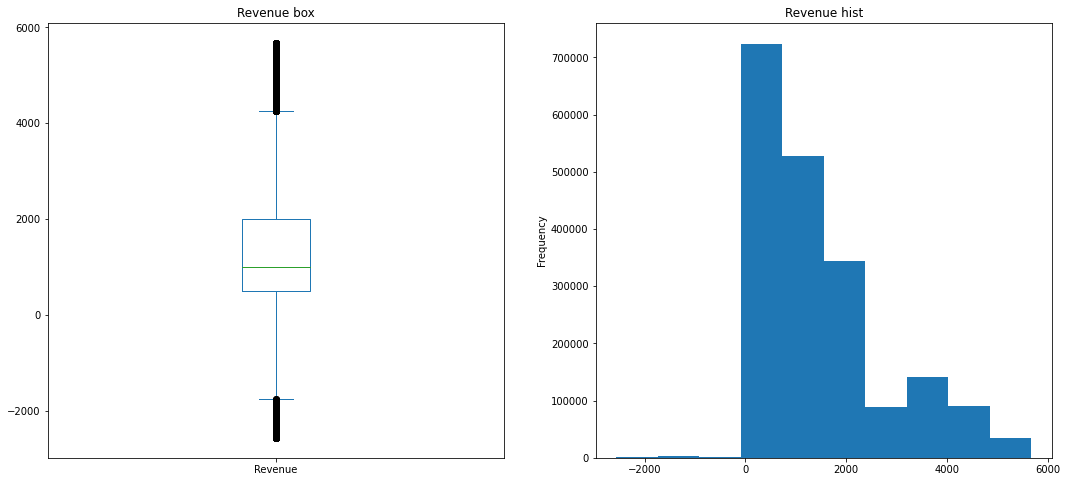

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data1['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data1['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

In [18]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957170 entries, 0 to 2182493
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   InvoiceNo             object 
 1   categorydescription   object 
 2   categorydescription1  object 
 3   StockCode             object 
 4   Description           object 
 5   Quantity              float64
 6   InvoiceDate           object 
 7   UnitPrice             float64
 8   CustomerID            float64
 9   Country               object 
 10  member_start_date     object 
 11  first_trans_date      object 
 12  Revenue               float64
dtypes: float64(4), object(9)
memory usage: 209.0+ MB


In [19]:
sales_data1['InvoiceDate'] = pd.to_datetime(sales_data1['InvoiceDate']) #轉換成datetime格式
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957170 entries, 0 to 2182493
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   InvoiceNo             object        
 1   categorydescription   object        
 2   categorydescription1  object        
 3   StockCode             object        
 4   Description           object        
 5   Quantity              float64       
 6   InvoiceDate           datetime64[ns]
 7   UnitPrice             float64       
 8   CustomerID            float64       
 9   Country               object        
 10  member_start_date     object        
 11  first_trans_date      object        
 12  Revenue               float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 209.0+ MB


In [20]:
sales_data1.InvoiceDate.dt.year

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
2182489    2021
2182490    2021
2182491    2021
2182492    2021
2182493    2021
Name: InvoiceDate, Length: 1957170, dtype: int64

In [21]:
sales_data1['YearMonth'] = sales_data1['InvoiceDate'].map(lambda date:100 * date.year+date.month)
sales_data1.head()

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5339001945,系統用,前臺收款,ZFE02,工本費,1.00,2018-11-01,350.00,9100000071084.00,中區,2000-12-15,2012-07-19,350.00,201811
1,PS5352014501,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002151296.00,中區,2016-04-28,2016-04-25,282.00,201811
2,PS5352014501,臉部主課程,不分版,HA89A01,肌因彈潤課程單堂,1.00,2018-11-01,1017.00,9100002151296.00,中區,2016-04-28,2016-04-25,1017.00,201811
3,PS5352014501,產品正貨,其他,Y129,魔可舒-如意,1.00,2018-11-01,2212.00,9100002151296.00,中區,2016-04-28,2016-04-25,2212.00,201811
4,PS5352014501,產品正貨,精油,JYA7G1,茶樹精油15ml,1.00,2018-11-01,1106.00,9100002151296.00,中區,2016-04-28,2016-04-25,1106.00,201811


### Customer_Segmentation

In [22]:
#create tx_user for assigning clustering
sales_data_user = pd.DataFrame(sales_data1['CustomerID'].unique())
sales_data_user.columns = ['CustomerID']


#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = sales_data1.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
print(tx_max_purchase)
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
sales_data_user = pd.merge(sales_data_user,tx_max_purchase[['CustomerID','Recency']], on='CustomerID')
sales_data_user

            CustomerID MaxPurchaseDate
0     9100000000060.00      2020-07-10
1     9100000000084.00      2021-02-28
2     9100000000091.00      2019-02-27
3     9100000000114.00      2021-01-23
4     9100000000152.00      2018-11-30
...                ...             ...
90619 9100003172979.00      2021-06-29
90620 9100003172993.00      2021-06-29
90621 9100003173013.00      2021-06-29
90622 9100003173075.00      2021-06-30
90623 9100003206438.00      2019-05-31

[90624 rows x 2 columns]


,CustomerID,Recency
0,9100000071084.00,292
1,9100002151296.00,2
2,9100001415320.00,761
3,9100001182833.00,144
4,9100001143964.00,696
...,...,...
90619,9100003172979.00,1
90620,9100003172993.00,1
90621,9100003173013.00,1
90622,9100001311806.00,0


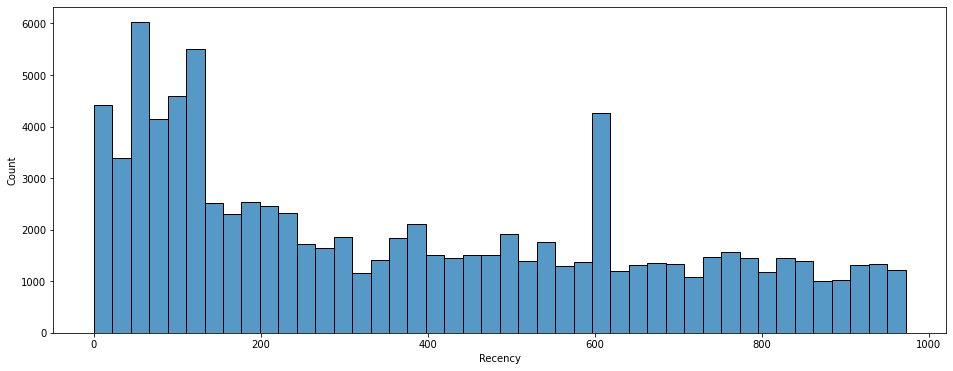

In [23]:
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Recency'],ax=axes)
plt.show()

In [24]:
sales_data_user.describe()

,CustomerID,Recency
count,90624.00,90624.00
mean,9100001847765.38,372.97
std,991957.29,287.28
min,9100000000060.00,0.00
25%,9100001039743.75,111.00
50%,9100002118923.50,308.00
75%,9100002700235.75,609.00
max,9100003206438.00,972.00


In [25]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
  #new_cluster_field_name = 'new_' + cluster_field_name
  df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
  df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
  df_new['index'] = df_new.index
  df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
  df_final = df_final.drop([cluster_field_name],axis=1)
  df_final = df_final.rename(columns={"index":cluster_field_name})
  return df_final

### 使用Elbow Method去找出要分幾群是好的

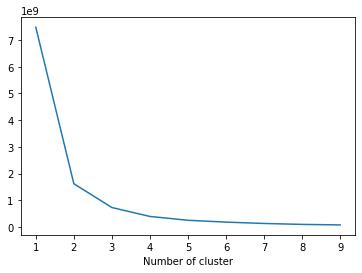

In [26]:
from sklearn.cluster import KMeans

sse={}
tx_recency = sales_data_user[['Recency']]
for k in range(1,10):
  kmeans = KMeans(n_clusters=k , max_iter=1000).fit(tx_recency)
  tx_recency["clusters"] = kmeans.labels_
  sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()


In [27]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Recency']])
sales_data_user['RecencyCluster'] = kmeans.predict(sales_data_user[['Recency']])

sales_data_user = order_cluster('RecencyCluster','Recency',sales_data_user,False)

sales_data_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,15377.00,837.59,75.86,709.00,770.00,833.00,907.00,972.00
1,19778.00,578.44,70.43,451.00,517.00,591.00,626.00,708.00
2,19187.00,321.16,72.32,207.00,254.00,316.00,387.00,450.00
3,36282.00,91.45,55.21,0.00,49.00,90.00,127.00,206.00


### Frequency

In [28]:
#get order counts for each user and create a dataframe with it
tx_frequency = sales_data1.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user, tx_frequency, on='CustomerID')
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency
0,9100000071084.00,292,2,15
1,9100001083550.00,305,2,19
2,9100001972304.00,340,2,23
3,9100000400785.00,305,2,20
4,9100001720561.00,308,2,43
...,...,...,...,...
90619,9100002836186.00,451,1,2
90620,9100002836162.00,451,1,1
90621,9100002836209.00,451,1,1
90622,9100002835974.00,451,1,1


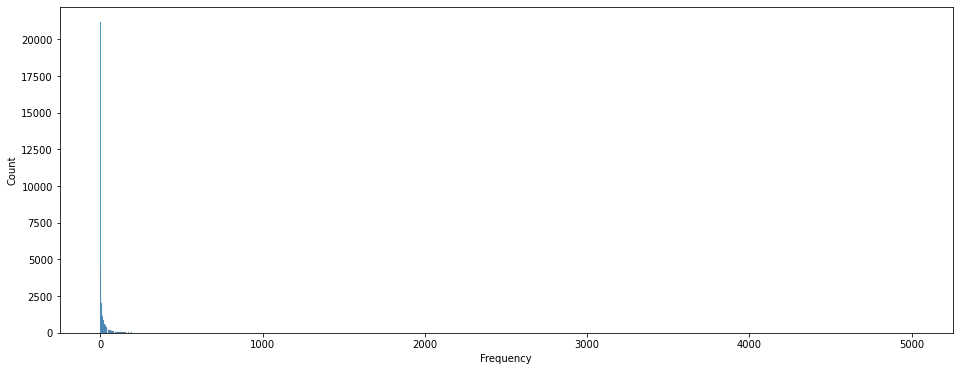

In [29]:
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Frequency'],ax=axes)
plt.show()

In [30]:
tx_frequency.Frequency.describe()

count   90624.00
mean       21.60
std        47.49
min         1.00
25%         2.00
50%         6.00
75%        23.00
max      5003.00
Name: Frequency, dtype: float64

In [31]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])

sales_data_user = order_cluster('FrequencyCluster','Frequency',sales_data_user,True)

sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,78009.00,8.91,10.71,1.00,1.00,3.00,13.00,44.00
1,11156.00,79.72,29.69,45.00,56.00,71.00,97.00,163.00
2,1454.00,246.47,102.70,164.00,184.00,213.00,270.00,1241.00
3,5.00,2823.00,1346.57,1702.00,1724.00,2710.00,2976.00,5003.00


In [32]:
sales_data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90624 entries, 0 to 90623
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        90624 non-null  float64
 1   Recency           90624 non-null  int64  
 2   RecencyCluster    90624 non-null  int64  
 3   Frequency         90624 non-null  int64  
 4   FrequencyCluster  90624 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 4.1 MB


In [33]:
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,9100000071084.00,292,2,15,0
1,9100001083550.00,305,2,19,0
2,9100001972304.00,340,2,23,0
3,9100000400785.00,305,2,20,0
4,9100001720561.00,308,2,43,0
...,...,...,...,...,...
90619,9100000092218.00,45,3,2976,3
90620,9100000063171.00,13,3,1724,3
90621,9100000089539.00,76,3,1702,3
90622,9100000300535.00,43,3,2710,3


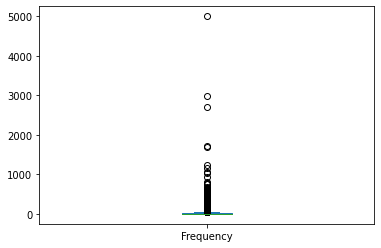

In [34]:
sales_data_user['Frequency'].plot.box()

In [35]:
#抓出異常值
lowerbound,highbound = Outlier_treatment(sales_data_user['Frequency'])

sales_data_user[(sales_data_user['Frequency']< lowerbound) | (sales_data_user['Frequency']>highbound)]

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
78011,9100000178806.00,286,2,71,1
78012,9100000355771.00,238,2,120,1
78014,9100000084404.00,288,2,55,1
78015,9100000712345.00,310,2,74,1
78016,9100000173634.00,241,2,73,1
...,...,...,...,...,...
90619,9100000092218.00,45,3,2976,3
90620,9100000063171.00,13,3,1724,3
90621,9100000089539.00,76,3,1702,3
90622,9100000300535.00,43,3,2710,3


In [36]:
sales_data_user.drop(sales_data_user[(sales_data_user['Frequency']< lowerbound) | (sales_data_user['Frequency']> highbound)].index,inplace=True) #去除異常值

In [37]:
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,9100000071084.00,292,2,15,0
1,9100001083550.00,305,2,19,0
2,9100001972304.00,340,2,23,0
3,9100000400785.00,305,2,20,0
4,9100001720561.00,308,2,43,0
...,...,...,...,...,...
89155,9100002676492.00,645,1,45,1
89156,9100001250426.00,608,1,51,1
89160,9100000128740.00,568,1,53,1
89161,9100002708704.00,463,1,49,1


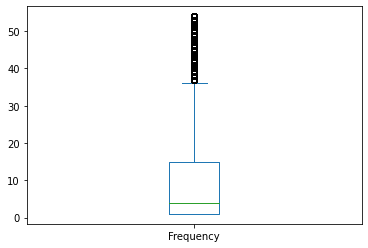

In [38]:
sales_data_user['Frequency'].plot.box()

In [39]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])

sales_data_user = order_cluster('FrequencyCluster','Frequency',sales_data_user,True)

sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,49706.00,2.38,1.73,1.00,1.00,2.00,3.00,7.00
1,15564.00,12.57,3.43,8.00,10.00,12.00,15.00,19.00
2,9042.00,26.18,4.31,20.00,22.00,26.00,30.00,34.00
3,6235.00,43.26,5.67,35.00,38.00,43.00,48.00,54.00


### Monetary

In [40]:
#calculate revenue for each customer
tx_revenue = sales_data1.groupby('CustomerID').Revenue.sum().reset_index()

#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user,tx_revenue,on='CustomerID')
sales_data_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,9100000071084.00,292,2,15,1,20699.00
1,9100001083550.00,305,2,19,1,29390.00
2,9100000123844.00,355,2,8,1,0.00
3,9100001265895.00,301,2,15,1,25712.00
4,9100000292243.00,234,2,13,1,7999.00


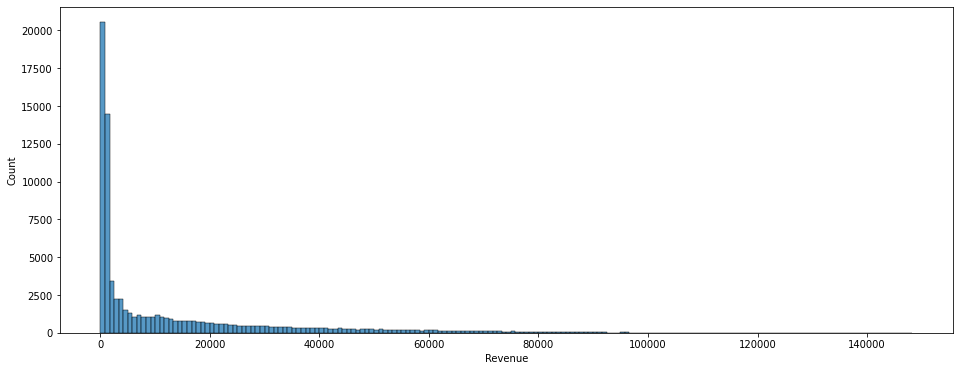

In [41]:
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Revenue'],ax=axes)
plt.show()

In [42]:
sales_data_user.Revenue.describe()

count    80547.00
mean     13223.13
std      19237.15
min          0.00
25%        800.00
50%       3139.00
75%      18834.00
max     148217.00
Name: Revenue, dtype: float64

In [43]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Revenue']])
sales_data_user['RevenueCluster'] = kmeans.predict(sales_data_user[['Revenue']])

sales_data_user = order_cluster('RevenueCluster','Revenue',sales_data_user,True)

sales_data_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,51740.00,2089.98,2535.63,0.00,599.00,998.00,2588.00,10359.00
1,15695.00,18598.43,5566.99,10360.00,13728.50,17863.00,23019.00,29894.00
2,8921.00,41185.61,7468.21,29899.00,34600.00,40333.00,47245.00,56068.00
3,4191.00,71016.06,12465.43,56078.00,61326.50,67914.00,77371.00,148217.00


### Customer Lifetime Value

### Total score

In [44]:
sales_data_user['OverallScore'] = sales_data_user['RecencyCluster'] + sales_data_user['FrequencyCluster'] + sales_data_user['RevenueCluster']
#sales_data_user['OverallScore']

print(sales_data_user.groupby('OverallScore')['Recency'].mean())
print(sales_data_user.groupby('OverallScore')['Frequency'].mean())
print(sales_data_user.groupby('OverallScore')['Revenue'].mean())

OverallScore
0   840.85
1   591.18
2   384.47
3   218.77
4   271.96
5   174.94
6   192.92
7   137.19
8   127.67
9    86.73
Name: Recency, dtype: float64
OverallScore
0    1.99
1    2.24
2    3.63
3    5.21
4   12.67
5   15.96
6   24.82
7   29.57
8   40.38
9   45.34
Name: Frequency, dtype: float64
OverallScore
0    1326.05
1    1820.04
2    3637.93
3    5809.03
4   15942.83
5   21501.88
6   32175.66
7   42243.77
8   53511.52
9   71975.66
Name: Revenue, dtype: float64


### Labeling

In [45]:
sales_data_user['Segment'] = 'Low-Value'
sales_data_user.loc[sales_data_user['OverallScore']>2,'Segment'] = 'Mid-Value'
sales_data_user.loc[sales_data_user['OverallScore']>4,'Segment'] = 'High-Value'
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100000071084.00,292,2,15,1,20699.00,1,4,Mid-Value
1,9100001083550.00,305,2,19,1,29390.00,1,4,Mid-Value
2,9100001265895.00,301,2,15,1,25712.00,1,4,Mid-Value
3,9100001379981.00,312,2,18,1,11021.00,1,4,Mid-Value
4,9100000197159.00,319,2,17,1,15419.00,1,4,Mid-Value
...,...,...,...,...,...,...,...,...,...
80542,9100002670520.00,467,1,53,3,81783.00,3,7,High-Value
80543,9100001899045.00,575,1,50,3,82530.00,3,7,High-Value
80544,9100002676492.00,645,1,45,3,88404.00,3,7,High-Value
80545,9100000128740.00,568,1,53,3,135733.00,3,7,High-Value


In [46]:
sales_data_user.to_csv("/content/drive/MyDrive/T大使/sales_data2.csv")

In [55]:
highvalue = sales_data_user[sales_data_user['OverallScore']==9]
highvalue

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
77236,9100000986722.00,80,3,43,3,70708.00,3,9,High-Value
77237,9100000242415.00,45,3,36,3,68459.00,3,9,High-Value
77238,9100001770504.00,14,3,38,3,67323.00,3,9,High-Value
77239,9100001244098.00,105,3,43,3,65828.00,3,9,High-Value
77240,9100000170008.00,55,3,41,3,56863.00,3,9,High-Value
...,...,...,...,...,...,...,...,...,...
80476,9100003097357.00,24,3,54,3,76618.00,3,9,High-Value
80477,9100003119943.00,17,3,46,3,78474.00,3,9,High-Value
80478,9100003123841.00,0,3,45,3,87752.00,3,9,High-Value
80479,9100003136582.00,1,3,51,3,57968.00,3,9,High-Value


### pycharm sales_data3

In [48]:
data3 = sales_data1.copy()
data3

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5339001945,系統用,前臺收款,ZFE02,工本費,1.00,2018-11-01,350.00,9100000071084.00,中區,2000-12-15,2012-07-19,350.00,201811
1,PS5352014501,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002151296.00,中區,2016-04-28,2016-04-25,282.00,201811
2,PS5352014501,臉部主課程,不分版,HA89A01,肌因彈潤課程單堂,1.00,2018-11-01,1017.00,9100002151296.00,中區,2016-04-28,2016-04-25,1017.00,201811
3,PS5352014501,產品正貨,其他,Y129,魔可舒-如意,1.00,2018-11-01,2212.00,9100002151296.00,中區,2016-04-28,2016-04-25,2212.00,201811
4,PS5352014501,產品正貨,精油,JYA7G1,茶樹精油15ml,1.00,2018-11-01,1106.00,9100002151296.00,中區,2016-04-28,2016-04-25,1106.00,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182489,PS5219003003,產品正貨,保健品,RAD2G2,紫錐花護體飲 10ml*10支,1.00,2021-06-30,500.00,9100002909996.00,竹區,2020-06-15,2020-06-15,500.00,202106
2182490,PS5219003003,產品正貨,保健品,RAACG1,健麗齊BC-HA複合益生菌3g*60包,1.00,2021-06-30,1050.00,9100002909996.00,竹區,2020-06-15,2020-06-15,1050.00,202106
2182491,PS5219003003,產品正貨,髮品,JAJ1G1,阿甘絲柔洗髮精800ml,1.00,2021-06-30,640.00,9100002909996.00,竹區,2020-06-15,2020-06-15,640.00,202106
2182492,PS5219003003,產品正貨,精油,JZB4G1,呼暢護隨精油30ml,1.00,2021-06-30,1140.00,9100002909996.00,竹區,2020-06-15,2020-06-15,1140.00,202106


In [49]:
data3['customer_type'] = "Existing"
data3

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
0,PS5339001945,系統用,前臺收款,ZFE02,工本費,1.00,2018-11-01,350.00,9100000071084.00,中區,2000-12-15,2012-07-19,350.00,201811,Existing
1,PS5352014501,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002151296.00,中區,2016-04-28,2016-04-25,282.00,201811,Existing
2,PS5352014501,臉部主課程,不分版,HA89A01,肌因彈潤課程單堂,1.00,2018-11-01,1017.00,9100002151296.00,中區,2016-04-28,2016-04-25,1017.00,201811,Existing
3,PS5352014501,產品正貨,其他,Y129,魔可舒-如意,1.00,2018-11-01,2212.00,9100002151296.00,中區,2016-04-28,2016-04-25,2212.00,201811,Existing
4,PS5352014501,產品正貨,精油,JYA7G1,茶樹精油15ml,1.00,2018-11-01,1106.00,9100002151296.00,中區,2016-04-28,2016-04-25,1106.00,201811,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182489,PS5219003003,產品正貨,保健品,RAD2G2,紫錐花護體飲 10ml*10支,1.00,2021-06-30,500.00,9100002909996.00,竹區,2020-06-15,2020-06-15,500.00,202106,Existing
2182490,PS5219003003,產品正貨,保健品,RAACG1,健麗齊BC-HA複合益生菌3g*60包,1.00,2021-06-30,1050.00,9100002909996.00,竹區,2020-06-15,2020-06-15,1050.00,202106,Existing
2182491,PS5219003003,產品正貨,髮品,JAJ1G1,阿甘絲柔洗髮精800ml,1.00,2021-06-30,640.00,9100002909996.00,竹區,2020-06-15,2020-06-15,640.00,202106,Existing
2182492,PS5219003003,產品正貨,精油,JZB4G1,呼暢護隨精油30ml,1.00,2021-06-30,1140.00,9100002909996.00,竹區,2020-06-15,2020-06-15,1140.00,202106,Existing


In [50]:
data3.loc[data3['member_start_date']==data3['first_trans_date'],"customer_type"]="New"
data3[data3['customer_type']=="New"]

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
17,PS5217024003,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002444084.00,台北B區,2018-02-10,2018-02-10,282.00,201811,New
18,PS5217024004,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100001680070.00,台北B區,2014-01-12,2014-01-12,282.00,201811,New
19,PS5217024005,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100001744017.00,台北B區,2014-05-25,2014-05-25,282.00,201811,New
20,PS5217024006,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002382652.00,台北B區,2017-09-01,2017-09-01,282.00,201811,New
24,PS5217024009,產品正貨,精油,JZA4G2,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002087809.00,台北B區,2016-03-01,2016-03-01,282.00,201811,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182489,PS5219003003,產品正貨,保健品,RAD2G2,紫錐花護體飲 10ml*10支,1.00,2021-06-30,500.00,9100002909996.00,竹區,2020-06-15,2020-06-15,500.00,202106,New
2182490,PS5219003003,產品正貨,保健品,RAACG1,健麗齊BC-HA複合益生菌3g*60包,1.00,2021-06-30,1050.00,9100002909996.00,竹區,2020-06-15,2020-06-15,1050.00,202106,New
2182491,PS5219003003,產品正貨,髮品,JAJ1G1,阿甘絲柔洗髮精800ml,1.00,2021-06-30,640.00,9100002909996.00,竹區,2020-06-15,2020-06-15,640.00,202106,New
2182492,PS5219003003,產品正貨,精油,JZB4G1,呼暢護隨精油30ml,1.00,2021-06-30,1140.00,9100002909996.00,竹區,2020-06-15,2020-06-15,1140.00,202106,New


In [51]:
sales_data3 = data3[['Description','Quantity','InvoiceDate','UnitPrice','CustomerID','YearMonth','Revenue','customer_type']]
sales_data3

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,YearMonth,Revenue,customer_type
0,工本費,1.00,2018-11-01,350.00,9100000071084.00,201811,350.00,Existing
1,輕鬆．清新複方按摩油30ml,1.00,2018-11-01,282.00,9100002151296.00,201811,282.00,Existing
2,肌因彈潤課程單堂,1.00,2018-11-01,1017.00,9100002151296.00,201811,1017.00,Existing
3,魔可舒-如意,1.00,2018-11-01,2212.00,9100002151296.00,201811,2212.00,Existing
4,茶樹精油15ml,1.00,2018-11-01,1106.00,9100002151296.00,201811,1106.00,Existing
...,...,...,...,...,...,...,...,...
2182489,紫錐花護體飲 10ml*10支,1.00,2021-06-30,500.00,9100002909996.00,202106,500.00,New
2182490,健麗齊BC-HA複合益生菌3g*60包,1.00,2021-06-30,1050.00,9100002909996.00,202106,1050.00,New
2182491,阿甘絲柔洗髮精800ml,1.00,2021-06-30,640.00,9100002909996.00,202106,640.00,New
2182492,呼暢護隨精油30ml,1.00,2021-06-30,1140.00,9100002909996.00,202106,1140.00,New


In [52]:
sales_data3.to_csv("/content/drive/MyDrive/T大使/sales_data3.csv")

In [59]:
data3[data3['Description']=="超防禦輕透隔離乳30ml"]

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
40,PS5554022214,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,1.00,2018-11-01,1000.00,9100000217802.00,高屏全區,2004-06-24,2013-04-26,1000.00,201811,Existing
574,PS536E003553,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,1.00,2018-11-01,500.00,9100000530420.00,彰雲區,2008-12-06,2012-10-06,500.00,201811,Existing
803,PS5440015199,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,2.00,2018-11-01,1000.00,9100001130667.00,南區,2011-05-04,2018-08-23,1000.00,201811,Existing
871,PS5525016254,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,1.00,2018-11-01,880.00,9100001348123.00,高屏全區,2010-10-16,2012-11-04,880.00,201811,Existing
1158,PS5360020526,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,1.00,2018-11-01,780.00,9100000472669.00,彰雲區,2007-11-27,2012-10-25,780.00,201811,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182074,PS5118026924,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,2.00,2021-06-30,317.00,9100000405803.00,台北B區,2006-12-23,2016-01-02,317.00,202106,Existing
2182092,PS5418008470,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,1.00,2021-06-30,574.00,9100000172651.00,南區,2004-06-13,2012-10-04,574.00,202106,Existing
2182320,PS5350029718,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,1.00,2021-06-30,540.00,9100000268590.00,中區,2003-08-29,2016-04-14,540.00,202106,Existing
2182478,PS5219003001,產品正貨,飾底乳/防曬,KV051,超防禦輕透隔離乳30ml,1.00,2021-06-30,540.00,9100001625507.00,竹區,2013-09-28,2013-09-23,540.00,202106,Existing


In [64]:
data[data['UnitPrice']==360000 ]

,InvoiceNo,categorydescription,categorydescription1,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
1802160,PS9230000785,系統用,券類,ZCP04,課程預付卡,1.00,2021-01-11,360000.00,9100000131139.00,佐登微爾,2003-08-01,2012-08-04,360000.00
1802171,PS9230000786,系統用,券類,ZCP04,課程預付卡,1.00,2021-01-11,360000.00,9100000131627.00,佐登微爾,2003-09-01,2012-10-05,360000.00
1867237,PS9410000119,系統用,券類,ZCP04,課程預付卡,1.00,2021-02-06,360000.00,9100000174952.00,佐登微爾,2004-01-31,2012-10-27,360000.00
2146492,PS9110000160,系統用,券類,ZCP04,課程預付卡,1.00,2021-05-28,360000.00,9100001031063.00,佐登微爾,2003-06-06,2012-10-07,360000.00
2180018,PS9110000339,系統用,券類,ZCP04,課程預付卡,1.00,2021-06-29,360000.00,9100000643847.00,佐登微爾,2011-02-20,2013-04-22,360000.00
